In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Обзор датасета
- Посмотрим на сам датасет
- Посмотрим на его характеристики
- Визуализируем характеристики


In [ ]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
stats = df.describe()
stats

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: title={'center': 'Mean and STD'}>

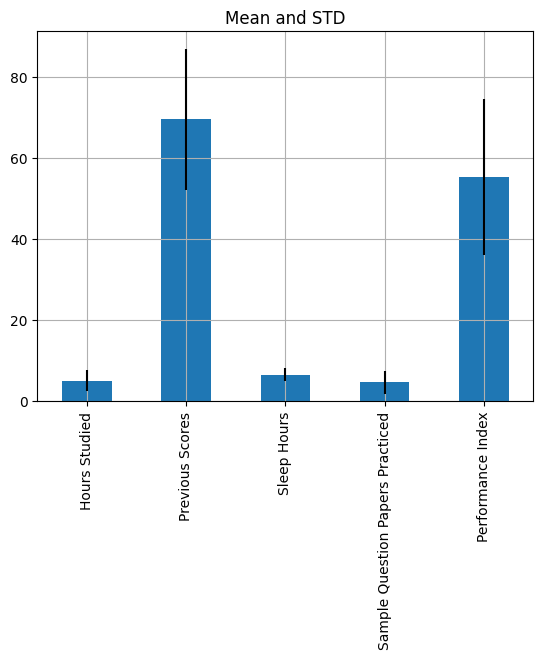

In [ ]:
# График среднего значения и отклонения
mean_std_df = stats.loc["mean":"std"].transpose()
mean_std_df.plot(kind="bar", y="mean", yerr="std", legend=False, title="Mean and STD", grid=True)

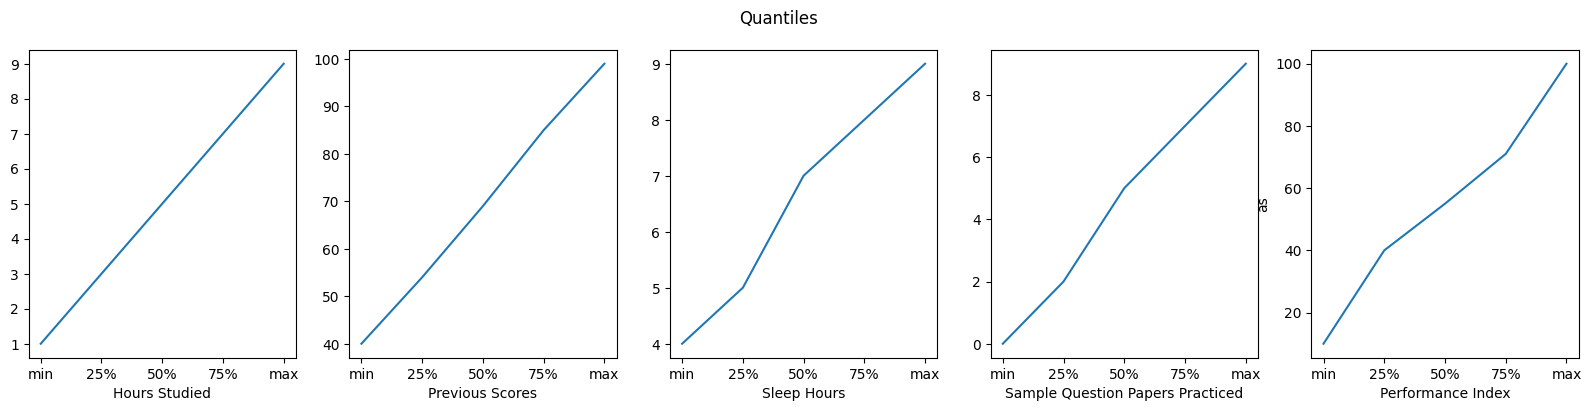

In [ ]:
# Графики квантилей
quant_df = stats["min":"max"]
cols = quant_df.columns
num_cols = len(cols)
x = quant_df.transpose().columns

fig, ax = plt.subplots(1, num_cols)
fig.set_size_inches(20, 4)
for i in range(num_cols):
    ax[i].plot(x, quant_df[cols[i]])
    ax[i].set_xlabel(cols[i])
fig.suptitle("Quantiles")
plt.show()



# Подготовка датасета
- Проверим наличие пропущенных данных
- Заменим категариальные признаки
- Нормируем
- Разделяем на тестовую и обучающие выборки

In [1]:
# Проверка количетсва пропущенных значений
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
# Обработка категориальных признаков
df1 = df.copy()
df1["Extracurricular Activities"] = df1["Extracurricular Activities"].apply(lambda x: int(x == "Yes"))
df1

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [ ]:
# Нормировка
df2 = (df1 - df1.min()) / (df1.max() - df1.min())
df2

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,0.900000
1,0.375,0.711864,0.0,0.0,0.222222,0.611111
2,0.875,0.186441,1.0,0.6,0.222222,0.388889
3,0.500,0.203390,1.0,0.2,0.222222,0.288889
4,0.750,0.593220,0.0,0.8,0.555556,0.622222
...,...,...,...,...,...,...
9995,0.000,0.152542,1.0,0.0,0.222222,0.144444
9996,0.750,0.406780,1.0,0.8,0.555556,0.533333
9997,0.625,0.728814,1.0,0.8,0.555556,0.711111
9998,1.000,0.966102,1.0,0.6,0.000000,0.944444


In [ ]:
# Разделение на тестовую и обучающую выборки
def train_test_split(X, y, split=0.8):
    data_len = len(X)
    train_len = int(data_len * split)
    test_len = data_len - train_len

    indicies = [i for i in range(data_len)]
    random.shuffle(indicies)
    train_ind = indicies[:train_len]
    test_ind = indicies[train_len:]

    return X.loc[train_ind], y.loc[train_ind], X.loc[test_ind], y.loc[test_ind]

# Тренировка моделей
- Используем метод линейной регрессии

$y = b_0 + b_1 \cdot x_1 + ... + b_n \cdot x_n$ или y = Xb

$S = \sum{(y_i - y_i')^2} = \sum{(y_i - (Xb))^2}$

$b = (X^TX)^{-1}X^Ty$

- Построим три модели с разными признаками
- Проверим качество моделей с помощью коэффициента детерминации

$R = 1 - \frac{SSE}{SST}$

$SSE = \sum{(y_i - y_i')^2}$ - отклонения от настоящего значения

$SST = \sum{(y_i - \bar{y_i})^2}$ - отклонения от среднего значения

In [ ]:
# Вставка вектора из единиц для свободного члена
def add_free(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

# Получение коэффициентов из матричного уравнения
def get_coeffs(X, y):
    X, y = np.array(X), np.array(y)
    X = add_free(X)
    b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return b


def do_prediction(X, coeffs):
    X = add_free(X)
    return X.dot(coeffs.T)

def get_R(y_pred, y_true):
    y_mean = y_true.mean()
    SSE = sum([(y1 - y2) ** 2 for y1, y2 in zip(y_pred, y_true)])
    SST = sum([(y - y_mean) ** 2 for y in y_true])

    return 1 - (SSE / SST)


X, y = df2.drop(columns=["Performance Index"]), df2["Performance Index"]

X_train, y_train, X_test, y_test = train_test_split(X, y)

# Создание трех наборов параметров, характеризующих модели
feat1 = ["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours", "Sample Question Papers Practiced"]
feat2 = ["Previous Scores"]
feat3 = ["Hours Studied", "Previous Scores"]

# Получение коэффициентов по МНК
coeff1 = get_coeffs(X_train[feat1], y_train)
coeff2 = get_coeffs(X_train[feat2], y_train)
coeff3 = get_coeffs(X_train[feat3], y_train)

print("Коэффициенты feat1:", coeff1)
print("Коэффициенты feat2:", coeff2)
print("Коэффициенты feat3:", coeff3)

# Предсказание значений
y_pred1 = do_prediction(X_test[feat1], coeff1)
y_pred2 = do_prediction(X_test[feat2], coeff2)
y_pred3 = do_prediction(X_test[feat3], coeff3)

Коэффициенты feat1: [0.01563231 0.25370249 0.66812706 0.00700926 0.02686842 0.01891085]
Коэффициенты feat2: [0.16955286 0.66579866]
Коэффициенты feat3: [0.0418923  0.2542522  0.66832103]


In [ ]:
# Оценка
R1 = get_R(y_pred1, y_test)
R2 = get_R(y_pred2, y_test)
R3 = get_R(y_pred3, y_test)

print("R feat1:", R1)
print("R feat2:", R2)
print("R feat3:", R3)


R feat1: 0.9884776002124497
R feat2: 0.8344136758017628
R feat3: 0.9855548468519193


# Синтетический признак
Введение синтетического признака - если занимался дополнительно, то +1 к часам подготовки. Заменяет "Hours Studied" и "Extracurricular Activities".


In [ ]:
df3 = df1.copy()
df3["Hours Studied"] = df3["Hours Studied"] + df3["Extracurricular Activities"]
df3 = df3.drop(columns=["Extracurricular Activities"])
df3

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,8,99,9,1,91.0
1,4,82,4,2,65.0
2,9,51,7,2,45.0
3,6,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,2,49,4,2,23.0
9996,8,64,8,5,58.0
9997,7,83,8,5,74.0
9998,10,97,7,0,95.0


Далее выполняем аналогичные действия по нормировке, разбиению выборки и генерации и оценки моделей

In [ ]:
# Нормировка
df4 = (df3 - df3.min()) / (df3.max() - df3.min())

# Тренировочный и тестовый
X, y = df4.drop(columns=["Performance Index"]), df2["Performance Index"]
X_train, y_train, X_test, y_test = train_test_split(X, y)

# Создание трех наборов параметров, характеризующих модели
feat1 = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
feat2 = ["Previous Scores"]
feat3 = ["Hours Studied", "Previous Scores"]

# Получение коэффициентов по МНК
coeff1 = get_coeffs(X_train[feat1], y_train)
coeff2 = get_coeffs(X_train[feat2], y_train)
coeff3 = get_coeffs(X_train[feat3], y_train)

print("Коэффициенты feat1:", coeff1)
print("Коэффициенты feat2:", coeff2)
print("Коэффициенты feat3:", coeff3)

# Предсказание значений
y_pred1 = do_prediction(X_test[feat1], coeff1)
y_pred2 = do_prediction(X_test[feat2], coeff2)
y_pred3 = do_prediction(X_test[feat3], coeff3)

# Оценка
R1 = get_R(y_pred1, y_test)
R2 = get_R(y_pred2, y_test)
R3 = get_R(y_pred3, y_test)

print("R feat1:", R1)
print("R feat2:", R2)
print("R feat3:", R3)


Коэффициенты feat1: [0.00755086 0.27664869 0.66757338 0.02716172 0.01974914]
Коэффициенты feat2: [0.16931526 0.66705915]
Коэффициенты feat3: [0.03100698 0.27688764 0.6678789 ]
R feat1: 0.9842091299873408
R feat2: 0.824532067202147
R feat3: 0.9814766871820393
